In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in data
schedule=pd.read_excel('../data/Marshall_Course_Enrollment_1516_1617.xlsx')
capacities=pd.read_excel('../data/Marshall_Room_Capacity_Chart.xlsx')

data = (pd.merge(schedule, capacities, how = 'left', left_on= 'First Room', right_on='Room')
       [['Term','Section','Department','First Begin Time','First Days','First End Time','First Room',
         'Reg Count','Size']]
       )
# clean building not included in capacitites
data = data[data['Size'].notnull()]

# calculate utility
data = data.rename(columns={'First Begin Time':'Begin','First Days':'Days',
                            'First End Time':'End','First Room':'Room','Reg Count':'Registered'})
# data = data.assign(Utility=lambda data: data.Registered/data.Size)

data.tail()

,Term,Section,Department,Begin,Days,End,Room,Registered,Size
2894,20172,66746,BUCO,12:00:00,MW,14:20:00,JFF312,17,20.0
2895,20172,66763,BUCO,15:00:00,TH,17:20:00,JFF327,17,36.0
2896,20172,66757,BUCO,09:00:00,TH,11:20:00,JFF313,18,20.0
2897,20172,66742,BUCO,09:00:00,MW,11:20:00,JFF313,16,20.0
2898,20172,66750,BUCO,15:00:00,MW,17:20:00,JFF313,19,20.0


In [88]:
def convert(inputTime):
    # define convert function
    try:
        hh,mm,ss=str(inputTime).split(':')
        ans=int(hh)+int(mm)/60+int(ss)/3600
    except:
        ans=np.nan
    return ans

In [89]:
data['Begin'] = data['Begin'].apply(convert)

In [90]:
data['End'] = data['End'].apply(convert)

In [91]:
data.head()

,Term,Section,Department,Begin,Days,End,Room,Registered,Size
1,20153,14025,ACCT,8.0,MW,9.833333,ACC303,24,46.0
2,20153,14026,ACCT,10.0,MW,11.833333,ACC303,40,46.0
3,20153,14027,ACCT,12.0,MW,13.833333,ACC303,42,46.0
5,20153,14040,ACCT,8.0,TH,9.833333,ACC303,29,46.0
6,20153,14042,ACCT,12.0,TH,13.833333,ACC303,40,46.0


In [92]:
dataTimeClean = data.drop(data[(data.Begin < float(10)) | (data.End > float(16))].index)
dataTimeClean.head()

,Term,Section,Department,Begin,Days,End,Room,Registered,Size
2,20153,14026,ACCT,10.0,MW,11.833333,ACC303,40,46.0
3,20153,14027,ACCT,12.0,MW,13.833333,ACC303,42,46.0
6,20153,14042,ACCT,12.0,TH,13.833333,ACC303,40,46.0
7,20153,14041,ACCT,10.0,TH,11.833333,ACC303,41,46.0
8,20153,14053,ACCT,12.0,F,13.833333,HOH EDI,144,269.0


In [93]:
print("data size:", data.shape)
print("dataBegSizeClean size:", dataBegSizeClean.shape)

data size: (1921, 9)
dataBegSizeClean size: (864, 9)


In [94]:
data20153 = dataBegSizeClean[dataBegSizeClean.Term == 20153]
print("data20153 size:", data20153.shape)

data20153 size: (159, 9)


In [95]:
data20153.tail()

,Term,Section,Department,Begin,Days,End,Room,Registered,Size
583,20153,16677,MOR,14.0,MW,15.833333,JKP104,56,56.0
587,20153,16700,MOR,12.5,MW,13.833333,JKP212,31,78.0
592,20153,16712,MOR,12.5,MW,13.833333,JKP112,33,77.0
598,20153,16707,MOR,14.0,MW,15.333333,JKP210,53,78.0
601,20153,16792,MOR,13.0,W,16.000000,HOH506,5,16.0


In [96]:
aggregations = {
    'Registered':'sum',
    'Size': 'sum'
}

In [97]:
data20153Group = data20153.groupby('Department').agg(aggregations)

In [98]:
data20153Group

,Registered,Size
Department,,
ACCT,2158,3417.0
BAEP,258,351.0
BUCO,243,331.0
DSO,1253,1552.0
FBE,1331,1994.0
MKT,1304,1700.0
MOR,1153,1393.0
UG Programs,94,269.0


In [99]:
data20153Group = data20153Group.assign(Utilization=lambda data20153Group: data20153Group.Registered/data20153Group.Size)

In [100]:
data20153Group

,Registered,Size,Utilization
Department,,,
ACCT,2158,3417.0,0.631548
BAEP,258,351.0,0.735043
BUCO,243,331.0,0.734139
DSO,1253,1552.0,0.807345
FBE,1331,1994.0,0.667503
MKT,1304,1700.0,0.767059
MOR,1153,1393.0,0.827710
UG Programs,94,269.0,0.349442


In [105]:
(data20153Group
 .reset_index(level=['Department'])
 .sort_values(['Utilization'])
 .plot(x='Department',y='Utilization',kind='bar', title='20153',figsize=(18,4),ylim=(0,1),legend=False)
)

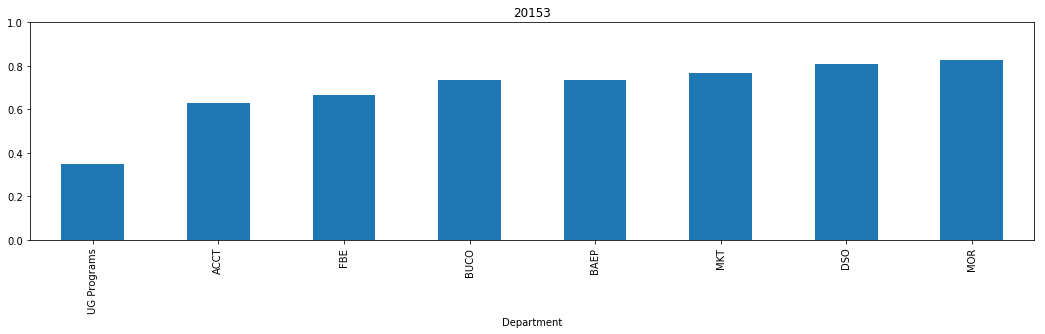

In [106]:
plt.show()